In [1]:
from datasets import load_dataset

In [8]:
dataset = load_dataset("sergiomadrid/imaterialist")
# dataset = load_dataset("mattmdjaga/human_parsing_dataset")

print(dataset)

README.md:   0%|          | 0.00/467 [00:00<?, ?B/s]

data/train-00000-of-00004.parquet:   0%|          | 0.00/395M [00:00<?, ?B/s]

data/train-00001-of-00004.parquet:   0%|          | 0.00/395M [00:00<?, ?B/s]

data/train-00002-of-00004.parquet:   0%|          | 0.00/395M [00:00<?, ?B/s]

data/train-00003-of-00004.parquet:   0%|          | 0.00/396M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/239M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45623 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3200 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'mask', 'ImageId'],
        num_rows: 45623
    })
    test: Dataset({
        features: ['image', 'mask', 'ImageId'],
        num_rows: 3200
    })
})


In [10]:
# Inspect a sample
sample = dataset['train'][0]
print("Sample keys:", sample.keys())


print(f"Image type: {type(sample['image'])}")
print(f"Image size: {sample['image'].size}")
print(f"Mask type: {type(sample['mask'])}")
print(f"Mask size: {sample['mask'].size}")

# Create a small subset for quick inspection
small_subset = dataset['train'].select(range(50))
print("Small subset size:", len(small_subset))

# Create a dataframe for easier inspection
import pandas as pd
df = pd.DataFrame(small_subset)
print(df.head())
print(df.info())

# Search replicates
image_hashes = {}
duplicates = []

for idx, item in enumerate(dataset['train']):
    img_bytes = item['image'].tobytes()
    img_hash = hash(img_bytes)

    if img_hash in image_hashes:
        duplicates.append({
            "original_idx": image_hashes[img_hash],
            "duplicate_idx": idx,
            "hash": img_hash
        })
    else:
        image_hashes[img_hash] = idx

print(f"Total duplicates found: {len(duplicates)}")
duplicates_indices = [list(d.values())[1] for d in duplicates]

import matplotlib.pyplot as plt

def show_duplicate_pair(dataset, dup_entry):
    idx1 = dup_entry["original_idx"]
    idx2 = dup_entry["duplicate_idx"]

    img1 = dataset['train'][idx1]['image']
    img2 = dataset['train'][idx2]['image']

    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    axs[0].imshow(img1)
    axs[0].set_title(f"Original ({idx1})")
    axs[0].axis("off")

    axs[1].imshow(img2)
    axs[1].set_title(f"Duplicate ({idx2})")
    axs[1].axis("off")

    plt.show()
if duplicates:
  show_duplicate_pair(dataset, duplicates[0])

Sample keys: dict_keys(['image', 'mask', 'ImageId'])
Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Image size: (512, 512)
Mask type: <class 'PIL.PngImagePlugin.PngImageFile'>
Mask size: (512, 512)
Small subset size: 50
                                               image  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                                                mask  \
0  <PIL.PngImagePlugin.PngImageFile image mode=L ...   
1  <PIL.PngImagePlugin.PngImageFile image mode=L ...   
2  <PIL.PngImagePlugin.PngImageFile image mode=L ...   
3  <PIL.PngImagePlugin.PngImageFile image mode=L ...   
4  <PIL.PngImagePlugin.PngImageFile image mode=L ...   

                            ImageId  
0  00000663ed1ff0c4e0132b9b9ac53f6e  
1  0000fe7c9191fba733

IndexError: list index out of range

Label distribution: {np.uint8(0): np.int64(122020341), np.uint8(4): np.int64(208257913), np.uint8(6): np.int64(229157686), np.uint8(28): np.int64(9475071), np.uint8(29): np.int64(16992791), np.uint8(31): np.int64(188587964), np.uint8(255): np.int64(9405994630), np.uint8(1): np.int64(408026739), np.uint8(33): np.int64(16218949), np.uint8(10): np.int64(735078414), np.uint8(23): np.int64(50549481), np.uint8(15): np.int64(4982981), np.uint8(8): np.int64(112832505), np.uint8(13): np.int64(3809266), np.uint8(24): np.int64(32453572), np.uint8(35): np.int64(1646810), np.uint8(19): np.int64(9590118), np.uint8(3): np.int64(37809953), np.uint8(32): np.int64(17379784), np.uint8(7): np.int64(34936810), np.uint8(37): np.int64(2992941), np.uint8(36): np.int64(5671038), np.uint8(14): np.int64(8370444), np.uint8(22): np.int64(1581592), np.uint8(18): np.int64(959062), np.uint8(17): np.int64(2044037), np.uint8(21): np.int64(17594106), np.uint8(42): np.int64(168008), np.uint8(2): np.int64(67994533), np.ui

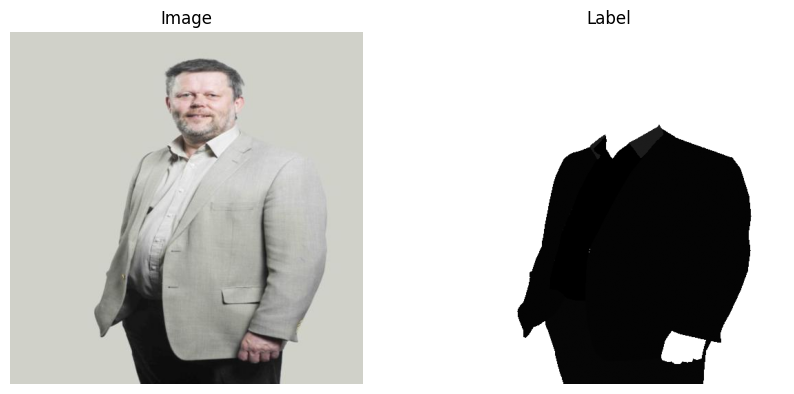

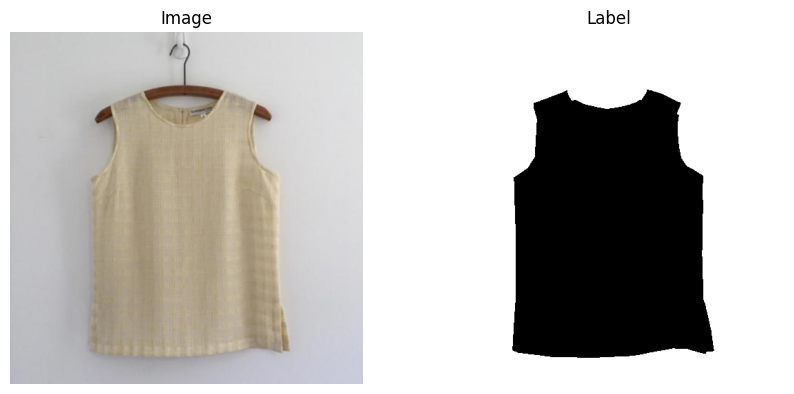

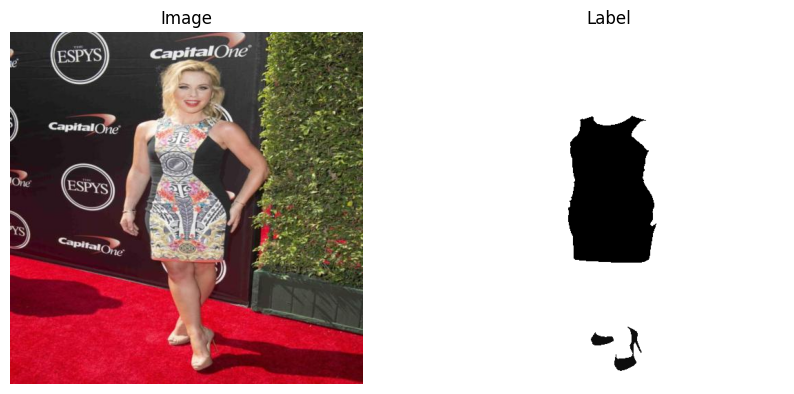

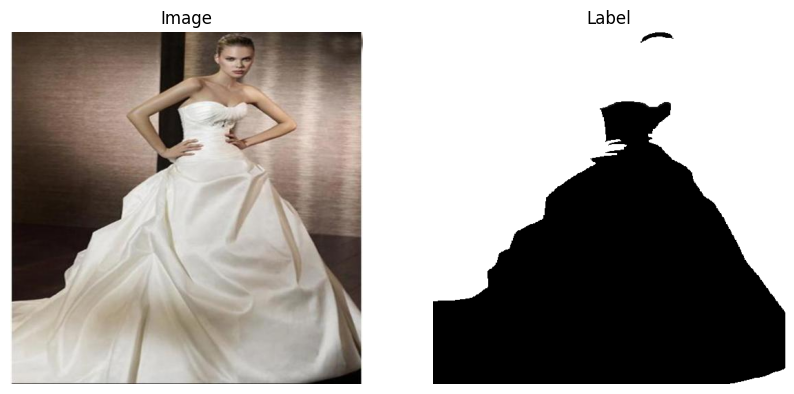

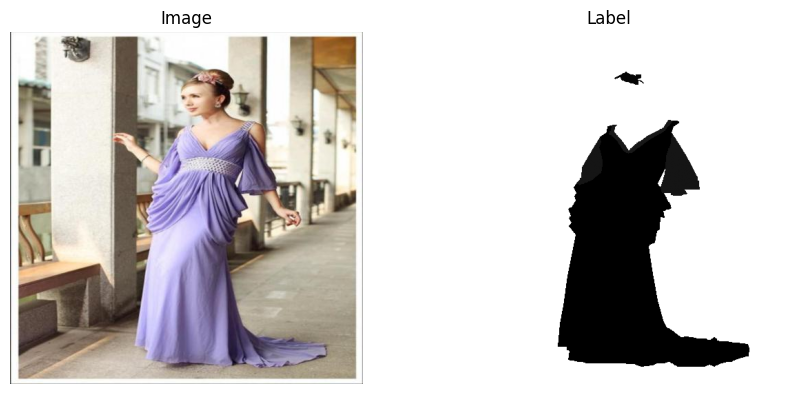

There are 0 corrupted entries and 0 missing entries


In [11]:
# Statistics on label distribution
import numpy as np
label_counts = {}
for item in dataset['train']:
    label_array = np.array(item['mask'])
    unique, counts = np.unique(label_array, return_counts=True)
    for u, c in zip(unique, counts):
        if u in label_counts:
            label_counts[u] += c
        else:
            label_counts[u] = c
print("Label distribution:", label_counts)

# Visualize some samples
import matplotlib.pyplot as plt
def visualize_sample(sample):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(sample['image'])
    ax[0].set_title('Image')
    ax[0].axis('off')

    ax[1].imshow(sample['mask'], cmap='gray')
    ax[1].set_title('Label')
    ax[1].axis('off')

    plt.show()

for i in range(5):
    visualize_sample(dataset['train'][i])

missing_indices = []
corrupted_indices = []

# Check for missing or corrupted data
for idx, item in enumerate(dataset['train']):
    if item['image'] is None or item['mask'] is None:
        missing_indices.append(idx)
    try:
        item['image'].verify()
    except Exception as e:
        corrupted_indices.append(idx)

print(f"There are {len(corrupted_indices)} corrupted entries and {len(missing_indices)} missing entries")

# Delete the missing or corrupted data entries if any
# if corrupted_indices:
#     dataset['train'] = dataset['train'].remove_indices(corrupted_indices)
#     print(f"Removed {len(corrupted_indices)} corrupted entries")
# if missing_indices:
#     dataset['train'] = dataset['train'].remove_indices(missing_indices)
#     print(f"Removed {len(missing_indices)} missing entries")
# if duplicates_indices:
#     dataset['train'] = dataset['train'].remove_indices(duplicates_indices)
#     print(f"Removed {len(duplicates_indices)} duplicated entries")

In [33]:
mask = dataset['train'][111]['mask']
mask = np.array(mask)

print(mask.shape)
print(mask.dtype)

np.unique(mask)


(512, 512)
uint8


array([  1,   4,   6,   9,  13,  14,  18,  23,  29,  31,  32,  33,  35,
       255], dtype=uint8)